### Task 4.2 Supervised Learning - Classification

- Load dataset (diabetes.csv)
  - Use `pandas.read_csv()`
- Fit a Generalized Linear Model (Logistic Regression)
  - Use `LogisticRegression` from `sklearn.linear_model`
  - Fit the model using `.fit(X, y)`
- Evaluate the model
  - Use `LinearRegression` from `sklearn.linear_model`
  - Fit the model using `.fit(X, y)`
- Evaluate the model
  - Use `.coef_` and `.intercept_` to extract coefficients
  - Use `sklearn.metrics.accuracy_score()` for model performance
  - Use `matplotlib.pyplot.plot()` to visualize predictions
- Train the model using cross-validation
  - Use `train_test_split` from `sklearn.model_selection`
  - Fit model on training data and evaluate on test data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

data = pd.read_csv("./assets/diabetes.csv")

In [4]:
data

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


We need to map the class varibale to 0 and 1. Afterwards, we can split the data to test and train parts so that the model can be trained properly.

In [6]:
data['class'] = data['class'].map({'tested_positive': 1, 'tested_negative': 0})

X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We define the logisitcal regression model

In [7]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

To be able to compare the performance, we also train a linear regression model.

In [8]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

y_pred_lin_class = (y_pred_lin >= 0.5).astype(int)

Finally, we can compare the performance of both models.

In [11]:
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_lin = accuracy_score(y_test, y_pred_lin_class)

print(f"accuracy log. reg.: {accuracy_log:.2f}")
print(f"acciracy lin. reg.: {accuracy_lin:.2f}")

print("log. reg. coef: ", log_model.coef_)
print("log. reg. intercept: ", log_model.intercept_)

print("lin. reg. coef: ", lin_model.coef_)
print("lin. reg. intercept: ", lin_model.intercept_)

accuracy log. reg.: 0.74
acciracy lin. reg.: 0.73
log. reg. coef:  [[ 0.05776407  0.03590214 -0.01086526 -0.0014118  -0.00098461  0.10909116
   0.37406831  0.03600844]]
log. reg. intercept:  [-9.43164131]
lin. reg. coef:  [ 0.00899394  0.00574161 -0.00171114 -0.00025321 -0.0001265   0.01617347
  0.07290169  0.0062645 ]
lin. reg. intercept:  -1.0013847024966278


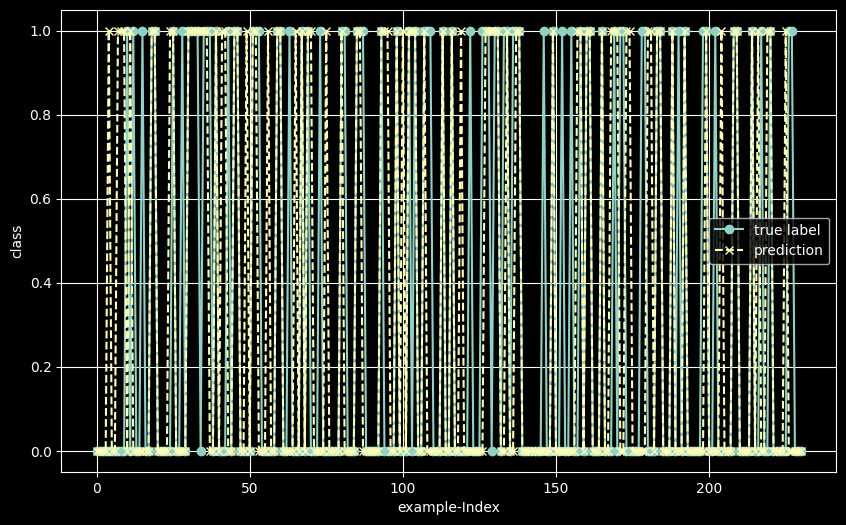

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='true label', marker='o')
plt.plot(y_pred_log, label='prediction', marker='x', linestyle='--')
plt.xlabel('example-Index')
plt.ylabel('class')
plt.legend()
plt.grid(True)
plt.show()